In [1]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.tools import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.models import Whisker
from astropy import units as u

In [2]:
R0 = 8.5 *u.kpc
V0 = 220 *(u.km/u.s)

In [3]:
raw = pd.read_csv ('lsrnew.csv')
raw

,longitude,v_obs_max,v_error
0,0,54.62,5
1,10,200.95,5
2,20,149.42,5
3,30,144.27,5
4,40,112.32,5
5,50,92.74,5
6,60,70.07,5
7,70,47.40,5
8,80,42.25,5
9,90,34.01,5


In [4]:
raw['R'] = (R0*np.sin(raw['longitude']*np.pi/180))*u.kpc

In [5]:
raw['V'] = (raw['v_obs_max']+(V0*np.sin(raw['longitude']*np.pi/180)))

In [6]:
raw['V_err']= raw['v_error'].copy()

In [7]:
raw.head(4)

,longitude,v_obs_max,v_error,R,V,V_err
0,0,54.62,5,0.000000,54.620000,5
1,10,200.95,5,1.476010,239.152599,5
2,20,149.42,5,2.907171,224.664432,5
3,30,144.27,5,4.250000,254.270000,5


Loading BokehJS ...

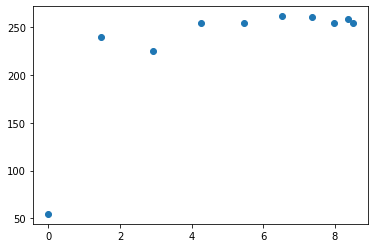

In [8]:
output_notebook() 
p = figure(title = "Rotation curve", x_axis_label = 'R', y_axis_label = 'V (km/s)')
p.scatter(raw['R'], raw['V'])
p.add_tools(HoverTool(mode='vline'))
src = ColumnDataSource(data=dict(
    y = raw['R'],
    lower = raw['V'] ,
    upper = raw['V']+ raw['V_err']))

w = Whisker(base='y', 
          lower='lower',
          upper='upper', 
          line_color='red', 
          dimension='height', 
          source=src)

p.add_layout(w)

show(p)


import matplotlib.pyplot as plt

plt.scatter (raw['R'], raw['V'])